# Calculating the Density of Georgia Forests - Model Training and Evaluation
### Group Members:
*   Jared Dunham 
*   Maniketh Aley
*   Samuel St John





###Load data into notebook (from google drive)

In [1]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd
#autenticating to google
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

#defining my worksheets
train_data_worksheet = gc.open('train_data_final').sheet1
val_data_worksheet = gc.open('val_data_final').sheet1
test_data_worksheet = gc.open('test_data_final').sheet1

#get_all_values gives a list of rows
train_rows = train_data_worksheet.get_all_values()
val_rows = val_data_worksheet.get_all_values()
test_rows = test_data_worksheet.get_all_values()

#Convert to a DataFrame 
train_data = pd.DataFrame(data=train_rows[1:], columns=train_rows[0])
val_data = pd.DataFrame(data=val_rows[1:], columns=val_rows[0])
test_data = pd.DataFrame(data=test_rows[1:], columns=test_rows[0])

#Ensuring the data is numeric
train_data = train_data.apply(pd.to_numeric)
val_data = val_data.apply(pd.to_numeric)
test_data = test_data.apply(pd.to_numeric)

#Dataframe Shapes
print("Training :", {train_data.shape})
print("Validation :", {val_data.shape})
print("Test :", {test_data.shape})


#train_data
#val_data
#test_data

Training : {(4738, 18)}
Validation : {(1599, 18)}
Test : {(1662, 18)}


###Import Python Libraries

In [2]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import SimpleRNN
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers import Bidirectional
from keras.layers import BatchNormalization
from keras.layers import LayerNormalization
from keras.preprocessing import sequence
from keras.layers import Reshape
from keras import Input
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
from keras import regularizers
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.regularizers import l2
from numpy import average

###Separate the targets from the features

In [4]:
feat_column_list = [col for col in train_data.columns if col != 'avg_tree_net_cubicfoot_vol_per_acre' and col != '']

#Training 
X_train = train_data.loc[:, feat_column_list]
Y_train = train_data.loc[:, 'avg_tree_net_cubicfoot_vol_per_acre']

#Validation
X_val = val_data.loc[:, feat_column_list]
Y_val = val_data.loc[:, 'avg_tree_net_cubicfoot_vol_per_acre']

#Test
X_test = test_data.loc[:, feat_column_list]
Y_test = test_data.loc[:, 'avg_tree_net_cubicfoot_vol_per_acre']

#Dataframe Shapes
print("Training features :", {X_train.shape})
print("Training targets :", {Y_train.shape})
print("Validation features :", {X_val.shape})
print("Validation targets :", {Y_val.shape})
print("Test features :", {X_test.shape})
print("Test targets:", {Y_test.shape})

Training features : {(4738, 16)}
Training targets : {(4738,)}
Validation features : {(1599, 16)}
Validation targets : {(1599,)}
Test features : {(1662, 16)}
Test targets: {(1662,)}


###Classic Deep NN Model

Epoch 1/40
119/119 [==============================] - 2s 7ms/step - loss: 0.2688 - mae: 0.2449 - mape: 108.1362 - val_loss: 0.0728 - val_mae: 0.1474 - val_mape: 98.5816
Epoch 2/40
119/119 [==============================] - 1s 5ms/step - loss: 0.0571 - mae: 0.1291 - mape: 76.6670 - val_loss: 0.0218 - val_mae: 0.1008 - val_mape: 85.1491
Epoch 3/40
119/119 [==============================] - 1s 5ms/step - loss: 0.0385 - mae: 0.1099 - mape: 81.0189 - val_loss: 0.0593 - val_mae: 0.1435 - val_mape: 107.9874
Epoch 4/40
119/119 [==============================] - 0s 4ms/step - loss: 0.0360 - mae: 0.0991 - mape: 57.9476 - val_loss: 0.0207 - val_mae: 0.0820 - val_mape: 56.3947
Epoch 5/40
119/119 [==============================] - 0s 4ms/step - loss: 0.0321 - mae: 0.0935 - mape: 51.5665 - val_loss: 0.0168 - val_mae: 0.0889 - val_mape: 69.0989
Epoch 6/40
119/119 [==============================] - 0s 4ms/step - loss: 0.0280 - mae: 0.0917 - mape: 45.8706 - val_loss: 0.0163 - val_mae: 0.0875 - val_mape

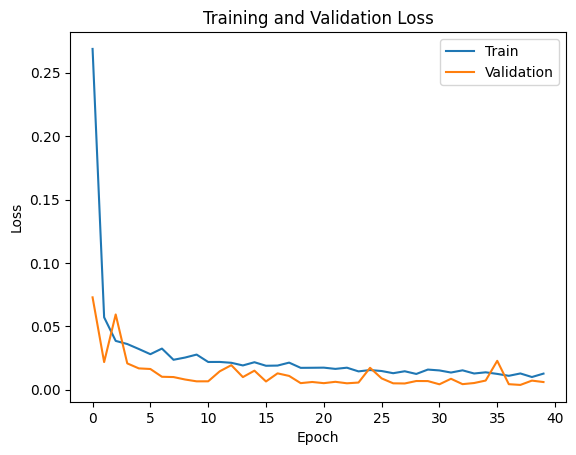

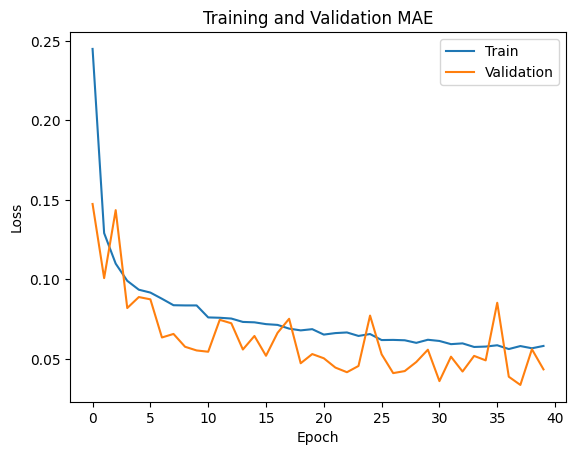

In [ ]:
#Initializing a copy of training, val, and test data
#Training 
X_train_DeepNN = X_train.copy()
Y_train_DeepNN = Y_train.copy()

#Validation
X_val_DeepNN = X_val.copy()
Y_val_DeepNN = Y_val.copy()

#Test
X_test_DeepNN = X_test.copy()
Y_test_DeepNN = Y_test.copy()

# define the architecture of the neural network
model_DeepNN = Sequential()
model_DeepNN.add(Dense(128, input_shape=(None, 16)))
model_DeepNN.add(Dense(32, activation='relu'))
model_DeepNN.add(Dense(16, activation='relu'))
model_DeepNN.add(Dense(1, activation='linear'))

# compile the model
model_DeepNN.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['mae','mape'])

# train the model
history = model_DeepNN.fit(X_train_DeepNN.values.reshape((-1,1,16)), Y_train_DeepNN, epochs=40, batch_size=40, 
                        validation_data=(X_val_DeepNN.values.reshape((-1,1,16)), Y_val_DeepNN))

print("Avg Loss: ", mean(history.history['loss']))
print("Avg Mae: ", mean(history.history['mae']))
print("Avg Val_Loss: ", mean(history.history['val_loss']))
print("Avg Val_Mae: ", mean(history.history['val_mae']))
print("Avg MAPE: ", mean(history.history['mape']))
print("Avg Val_MAPE: ", mean(history.history['val_mape']))

# plot the training and validation loss over epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# plot the training and validation MAE over epochs
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Training and Validation MAE')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
#Calculating the RRMSE of the the Testing and Validation Data
y_test_pred_DeepNN = model_DeepNN.predict(X_test_DeepNN.values.reshape((-1,1,16)))
y_val_pred_DeepNN = model_DeepNN.predict(X_val_DeepNN.values.reshape((-1,1,16)))

# Calculate RMSE and RRMSE for testing data
rmse_test_DeepNN = np.sqrt(mean_squared_error(Y_test_DeepNN, y_test_pred_DeepNN.flatten()))
rrmse_test_DeepNN = rmse_test_DeepNN / (np.max(Y_test_DeepNN) - np.min(Y_test_DeepNN))

# Calculate RMSE and RRMSE for validation data
rmse_val_DeepNN = np.sqrt(mean_squared_error(Y_val_DeepNN, y_val_pred_DeepNN.flatten()))
rrmse_val_DeepNN = rmse_val_DeepNN / (np.max(Y_val_DeepNN) - np.min(Y_val_DeepNN))

print("Validation RRMSE: ", rrmse_val_DeepNN)
print("Testing RRMSE: ", rrmse_test_DeepNN)

50/50 [==============================] - 0s 1ms/step
Validation RRMSE:  0.013721712220747275
Testing RRMSE:  0.05392540020342091


In [ ]:
# Evaluating on test data
model_DeepNN.evaluate(X_test_DeepNN.values.reshape((-1,1,16)), Y_test_DeepNN)

52/52 [==============================] - 0s 2ms/step - loss: 0.0053 - mae: 0.0483


[0.005303084850311279, 0.04826241731643677]

###Classic RNN Model

Epoch 1/50
119/119 [==============================] - 4s 10ms/step - loss: 0.1400 - mae: 0.1913 - mape: 84.6402 - val_loss: 0.0160 - val_mae: 0.0892 - val_mape: 59.9933
Epoch 2/50
119/119 [==============================] - 1s 6ms/step - loss: 0.0443 - mae: 0.1175 - mape: 82.4825 - val_loss: 0.0092 - val_mae: 0.0653 - val_mape: 51.5104
Epoch 3/50
119/119 [==============================] - 1s 6ms/step - loss: 0.0321 - mae: 0.1003 - mape: 68.3433 - val_loss: 0.0174 - val_mae: 0.0908 - val_mape: 79.0754
Epoch 4/50
119/119 [==============================] - 1s 7ms/step - loss: 0.0292 - mae: 0.0895 - mape: 59.2624 - val_loss: 0.0853 - val_mae: 0.1688 - val_mape: 119.7298
Epoch 5/50
119/119 [==============================] - 1s 9ms/step - loss: 0.0216 - mae: 0.0837 - mape: 59.3854 - val_loss: 0.0086 - val_mae: 0.0591 - val_mape: 40.2374
Epoch 6/50
119/119 [==============================] - 1s 9ms/step - loss: 0.0217 - mae: 0.0780 - mape: 59.2903 - val_loss: 0.0087 - val_mae: 0.0568 - val_mape

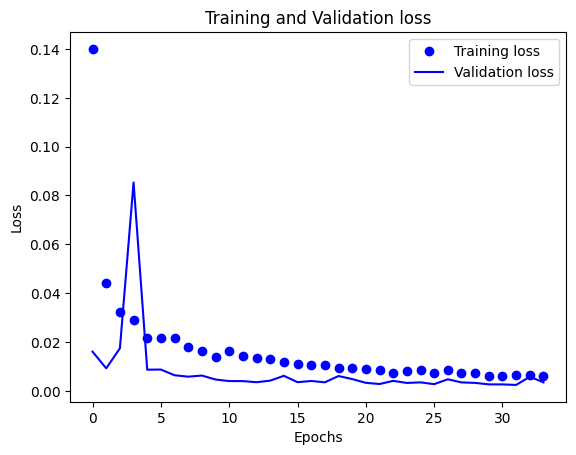

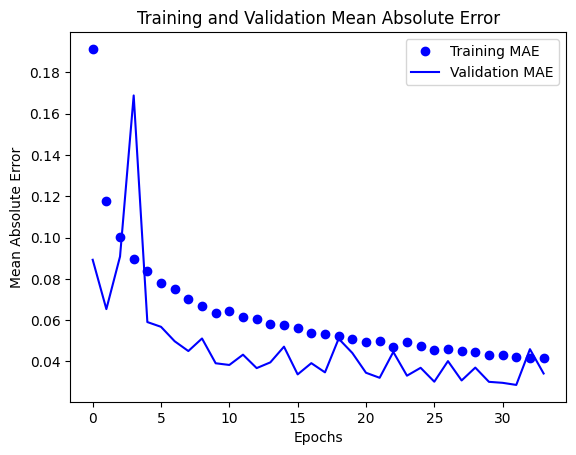

52/52 [==============================] - 0s 3ms/step - loss: 0.0031 - mae: 0.0348 - mape: 48.9703


ValueError: ignored

In [ ]:
#Training 
X_train_rnn = X_train.copy()
Y_train_rnn = Y_train.copy()

#Validation
X_val_rnn = X_val.copy()
Y_val_rnn = Y_val.copy()

#Test
X_test_rnn = X_test.copy()
Y_test_rnn = Y_test.copy()

callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3)

model_rnn = Sequential()
model_rnn.add(SimpleRNN(192, input_shape=(None, 16), return_sequences=True, activation='relu'))
model_rnn.add(SimpleRNN(128, return_sequences=True, activation='relu')) 
model_rnn.add(SimpleRNN(64, return_sequences=True, activation='relu'))
model_rnn.add(Dense(1, activation='linear'))

model_rnn.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['mae','mape'])
history_rnn = model_rnn.fit(X_train_rnn.values.reshape((-1,1,16)), Y_train_rnn, epochs=50, batch_size=40, 
                        validation_data=(X_val_rnn.values.reshape((-1,1,16)), Y_val_rnn), callbacks=[callback])

print()
print("Metrics Averaged")
print("===========================")
print("Avg Loss: ", np.mean(history_rnn.history['loss']))
print("Avg Mae: ", np.mean(history_rnn.history['mae']))
print("Avg Val_Loss: ", np.mean(history_rnn.history['val_loss']))
print("Avg Val_Mae: ", np.mean(history_rnn.history['val_mae']))
print("Avg MAPE: ", mean(history_rnn.history['mape']))
print("Avg Val_MAPE: ", mean(history_rnn.history['val_mape']))
print()

#Graphing MAEs and Losses by Epoch
epochs = range(len(history_rnn.epoch))

plt.plot(epochs, history_rnn.history['loss'], 'bo', label='Training loss')
plt.plot(epochs, history_rnn.history['val_loss'], 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.plot(epochs, history_rnn.history['mae'], 'bo', label='Training MAE')
plt.plot(epochs, history_rnn.history['val_mae'], 'b', label='Validation MAE')
plt.title('Training and Validation Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.show()

#Evaluating test data
loss, mae = model_rnn.evaluate(X_test_rnn.values.reshape((-1,1,16)), Y_test_rnn)
print()
print("Final Evaluation on Test Data")
print("Loss: ", loss)
print("Mae: ", mae)
print()

#Calculating the RRMSE of the the Training and Validation Data

y_test_pred_rnn = model_rnn.predict(X_test_rnn.values.reshape((-1,1,16)))
y_val_pred_rnn = model_rnn.predict(X_val_rnn.values.reshape((-1,1,16)))

# Calculate RMSE and RRMSE for training data
rmse_test_rnn = np.sqrt(mean_squared_error(Y_test_rnn, y_test_pred_rnn.flatten()))
rrmse_test_rnn = rmse_test_rnn / (np.max(Y_test_rnn) - np.min(Y_test_rnn))

# Calculate RMSE and RRMSE for validation data
rmse_val_rnn = np.sqrt(mean_squared_error(Y_val_rnn, y_val_pred_rnn.flatten()))
rrmse_val_rnn = rmse_val_rnn / (np.max(Y_val_rnn) - np.min(Y_val_rnn))

print("Test RRMSE: ", rrmse_test_rnn)
print("Validation RRMSE: ", rrmse_val_rnn)

###LSTM RNN Model

Epoch 1/50
119/119 [==============================] - 6s 27ms/step - loss: 0.2495 - mae: 0.3035 - mape: 218.0098 - val_loss: 0.0488 - val_mae: 0.1585 - val_mape: 107.2946
Epoch 2/50
119/119 [==============================] - 3s 25ms/step - loss: 0.0707 - mae: 0.1542 - mape: 111.7705 - val_loss: 0.0173 - val_mae: 0.0856 - val_mape: 73.6065
Epoch 3/50
119/119 [==============================] - 2s 20ms/step - loss: 0.0507 - mae: 0.1183 - mape: 78.1957 - val_loss: 0.0196 - val_mae: 0.0932 - val_mape: 64.9202
Epoch 4/50
119/119 [==============================] - 2s 19ms/step - loss: 0.0347 - mae: 0.0978 - mape: 58.6610 - val_loss: 0.0095 - val_mae: 0.0616 - val_mape: 51.0421
Epoch 5/50
119/119 [==============================] - 2s 19ms/step - loss: 0.0306 - mae: 0.0884 - mape: 53.2286 - val_loss: 0.0105 - val_mae: 0.0648 - val_mape: 40.0955
Epoch 6/50
119/119 [==============================] - 3s 21ms/step - loss: 0.0245 - mae: 0.0770 - mape: 48.3580 - val_loss: 0.0133 - val_mae: 0.0715 - v

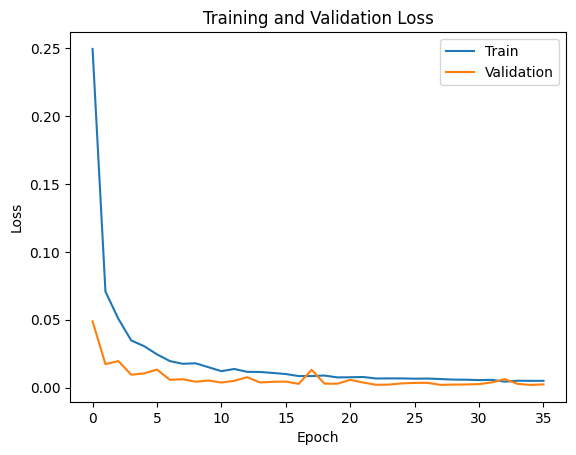

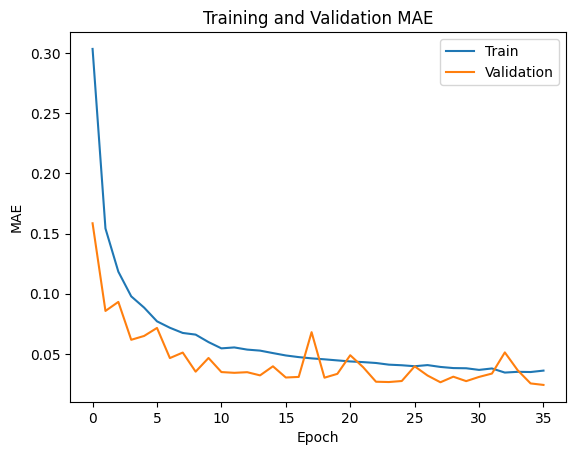

In [ ]:
# Copying train, test, validation data 
X_train_lstm = X_train.copy()
Y_train_lstm = Y_train.copy()

X_val_lstm = X_val.copy()
Y_val_lstm = Y_val.copy()

X_test_lstm = X_test.copy()
Y_test_lstm = Y_test.copy()

callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3)

# Create model
model_lstm = Sequential()
model_lstm.add(LSTM(256, input_shape=(None, 16), return_sequences=True, activation='relu'))
model_lstm.add(LayerNormalization())
model_lstm.add(LSTM(128, input_shape=(None, 16), return_sequences=True, activation='relu'))
model_lstm.add(LayerNormalization())
model_lstm.add(Dense(32, activation = 'relu'))
model_lstm.add(Dense(1, activation='linear'))

model_lstm.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['mae', 'mape'])
history = model_lstm.fit(X_train_lstm.values.reshape((-1,1,16)), Y_train_lstm, epochs=50, batch_size=40, 
                        validation_data=(X_val_lstm.values.reshape((-1,1,16)), Y_val_lstm), callbacks=[callback])

print("Avg Loss: ", mean(history.history['loss']))
print("Avg Mae: ", mean(history.history['mae']))
print("Avg Val_Loss: ", mean(history.history['val_loss']))
print("Avg Val_Mae: ", mean(history.history['val_mae']))
print("Avg MAPE: ", mean(history.history['mape']))
print("Avg Val_MAPE: ", mean(history.history['val_mape']))

# plot the training and validation loss over epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# plot the training and validation MAE over epochs
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Training and Validation MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
#Calculating the RRMSE of the the Training and Validation Data
y_train_pred_lstm = model_lstm.predict(X_train_lstm.values.reshape((-1,1,16)))
y_val_pred_lstm = model_lstm.predict(X_val_lstm.values.reshape((-1,1,16)))

# Calculate RMSE and RRMSE for training data
rmse_train_lstm = np.sqrt(mean_squared_error(Y_train_lstm, y_train_pred_lstm.flatten()))
rrmse_train_lstm = rmse_train_lstm / (np.max(Y_train_lstm) - np.min(Y_train_lstm))

# Calculate RMSE and RRMSE for validation data
rmse_val_lstm = np.sqrt(mean_squared_error(Y_val_lstm, y_val_pred_lstm.flatten()))
rrmse_val_lstm = rmse_val_lstm / (np.max(Y_val_lstm) - np.min(Y_val_lstm))

print("Training RRMSE: ", rrmse_train_lstm)
print("Validation RRMSE: ", rrmse_val_lstm)

50/50 [==============================] - 0s 7ms/step
Training RRMSE:  0.007861292822189869
Validation RRMSE:  0.009746685782852475


In [ ]:
# Evaluating on the testing data
model_lstm.evaluate(X_test_lstm.values.reshape((-1,1,16)), Y_test_lstm)

52/52 [==============================] - 0s 5ms/step - loss: 0.0016 - mae: 0.0249 - mape: 21.1585


[0.0015628405380994081, 0.024885734543204308, 21.158536911010742]

###GRU RNN Model (with Layer Normalization)

Epoch 1/50
119/119 [==============================] - 5s 18ms/step - loss: 0.2562 - mae: 0.3181 - mape: 282.7875 - val_loss: 0.0419 - val_mae: 0.1443 - val_mape: 108.8319
Epoch 2/50
119/119 [==============================] - 2s 16ms/step - loss: 0.0747 - mae: 0.1664 - mape: 123.0734 - val_loss: 0.0256 - val_mae: 0.1214 - val_mape: 104.8419
Epoch 3/50
119/119 [==============================] - 2s 13ms/step - loss: 0.0514 - mae: 0.1312 - mape: 89.3292 - val_loss: 0.0154 - val_mae: 0.0788 - val_mape: 67.2474
Epoch 4/50
119/119 [==============================] - 2s 19ms/step - loss: 0.0416 - mae: 0.1133 - mape: 80.7694 - val_loss: 0.0435 - val_mae: 0.1036 - val_mape: 65.7402
Epoch 5/50
119/119 [==============================] - 2s 17ms/step - loss: 0.0301 - mae: 0.0958 - mape: 57.3840 - val_loss: 0.0102 - val_mae: 0.0653 - val_mape: 57.1390
Epoch 6/50
119/119 [==============================] - 2s 13ms/step - loss: 0.0281 - mae: 0.0886 - mape: 49.6719 - val_loss: 0.0102 - val_mae: 0.0608 - 

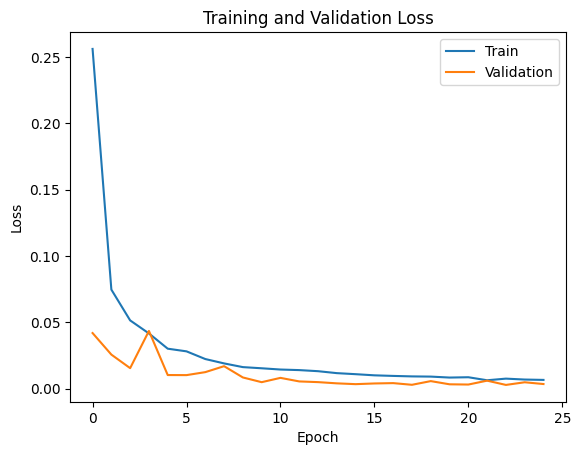

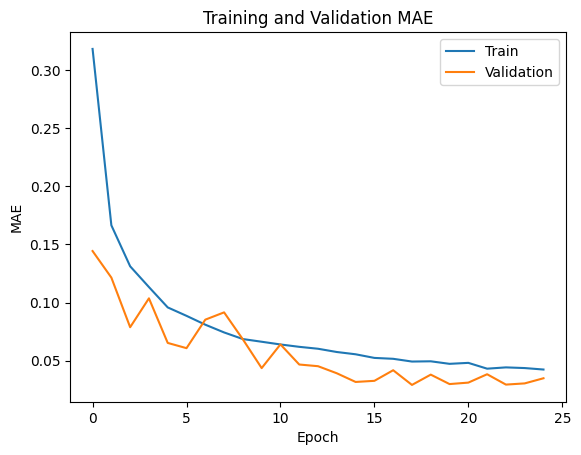

In [ ]:
# Copying train, test, validation data 
X_train_gru = X_train.copy()
Y_train_gru = Y_train.copy()

X_val_gru = X_val.copy()
Y_val_gru = Y_val.copy()

X_test_gru = X_test.copy()
Y_test_gru = Y_test.copy()

callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3)

# Create model
model_gru = Sequential()
model_gru.add(GRU(256, input_shape=(None, 16), return_sequences=True, activation='relu'))
model_gru.add(LayerNormalization())
model_gru.add(GRU(128, input_shape=(None, 16), return_sequences=True, activation='relu'))
model_gru.add(LayerNormalization())
model_gru.add(Dense(32, activation = 'relu'))
model_gru.add(Dense(1, activation='linear'))

model_gru.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['mae', 'mape'])
history = model_gru.fit(X_train_gru.values.reshape((-1,1,16)), Y_train_gru, epochs=50, batch_size=40, 
                        validation_data=(X_val_gru.values.reshape((-1,1,16)), Y_val_gru), callbacks=[callback])

print("Avg Loss: ", mean(history.history['loss']))
print("Avg Mae: ", mean(history.history['mae']))
print("Avg Val_Loss: ", mean(history.history['val_loss']))
print("Avg Val_Mae: ", mean(history.history['val_mae']))
print("Avg MAPE: ", mean(history.history['mape']))
print("Avg Val_MAPE: ", mean(history.history['val_mape']))

# plot the training and validation loss over epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# plot the training and validation MAE over epochs
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Training and Validation MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
#Calculating the RRMSE of the the Training and Validation Data
y_train_pred_gru = model_gru.predict(X_train_gru.values.reshape((-1,1,16)))
y_val_pred_gru = model_gru.predict(X_val_gru.values.reshape((-1,1,16)))

# Calculate RMSE and RRMSE for training data
rmse_train_gru = np.sqrt(mean_squared_error(Y_train_gru, y_train_pred_gru.flatten()))
rrmse_train_gru = rmse_train_gru / (np.max(Y_train_gru) - np.min(Y_train_gru))

# Calculate RMSE and RRMSE for validation data
rmse_val_gru = np.sqrt(mean_squared_error(Y_val_gru, y_val_pred_gru.flatten()))
rrmse_val_gru = rmse_val_gru / (np.max(Y_val_gru) - np.min(Y_val_gru))

print("Training RRMSE: ", rrmse_train_gru)
print("Validation RRMSE: ", rrmse_val_gru)

50/50 [==============================] - 0s 5ms/step
Training RRMSE:  0.0065038715010209
Validation RRMSE:  0.008956297101701375


In [ ]:
# Evaluate on the test data
model_gru.evaluate(X_test_gru.values.reshape((-1,1,16)), Y_test_gru)

52/52 [==============================] - 0s 4ms/step - loss: 0.0019 - mae: 0.0263 - mape: 23.2808


[0.0018941054586321115, 0.026262493804097176, 23.28083610534668]

###GRU RNN Model (Dropout)

Epoch 1/40
119/119 [==============================] - 5s 18ms/step - loss: 0.2148 - mae: 0.2089 - mape: 69.3985 - val_loss: 0.0243 - val_mae: 0.0946 - val_mape: 59.4231
Epoch 2/40
119/119 [==============================] - 2s 14ms/step - loss: 0.0701 - mae: 0.1246 - mape: 81.8814 - val_loss: 0.0149 - val_mae: 0.0808 - val_mape: 68.1303
Epoch 3/40
119/119 [==============================] - 2s 20ms/step - loss: 0.0404 - mae: 0.1052 - mape: 60.0216 - val_loss: 0.0122 - val_mae: 0.0637 - val_mape: 49.2533
Epoch 4/40
119/119 [==============================] - 2s 20ms/step - loss: 0.0287 - mae: 0.0898 - mape: 51.1146 - val_loss: 0.0046 - val_mae: 0.0399 - val_mape: 29.9270
Epoch 5/40
119/119 [==============================] - 2s 14ms/step - loss: 0.0210 - mae: 0.0764 - mape: 45.2328 - val_loss: 0.0049 - val_mae: 0.0407 - val_mape: 27.4606
Epoch 6/40
119/119 [==============================] - 2s 14ms/step - loss: 0.0161 - mae: 0.0692 - mape: 43.4846 - val_loss: 0.0059 - val_mae: 0.0446 - val_

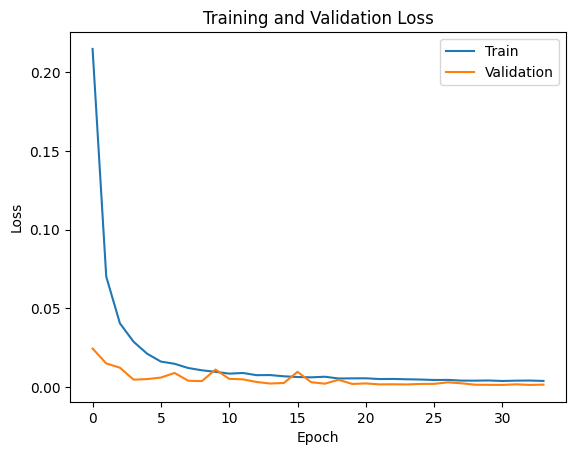

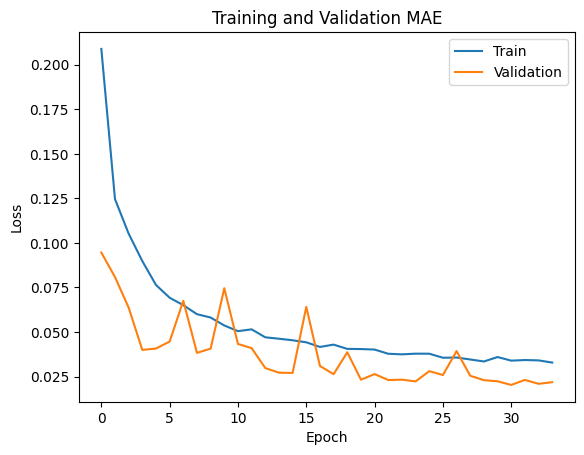

In [30]:
#Training 
X_train_gru = X_train.copy()
Y_train_gru = Y_train.copy()

#Validation
X_val_gru = X_val.copy()
Y_val_gru = Y_val.copy()

#Test
X_test_gru = X_test.copy()
Y_test_gru = Y_test.copy()

callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3)

model_gru = Sequential()
model_gru.add(GRU(256, input_shape=(None, 16), return_sequences=True, activation='relu'))
model_gru.add(GRU(128, return_sequences=True, activation='relu')) 
model_gru.add(Dense(1, activation='linear'))

model_gru.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['mae', 'mape'])
history_gru = model_gru.fit(X_train_gru.values.reshape((-1,1,16)), Y_train_gru, epochs=40, batch_size=40, 
                        validation_data=(X_val_gru.values.reshape((-1,1,16)), Y_val_gru), callbacks=[callback])

print("Avg Loss: ", np.mean(history_gru.history['loss']))
print("Avg Mae: ", np.mean(history_gru.history['mae']))
print("Avg Val_Loss: ", np.mean(history_gru.history['val_loss']))
print("Avg Val_Mae: ", np.mean(history_gru.history['val_mae']))
print("Avg MAPE: ", mean(history_gru.history['mape']))
print("Avg Val_MAPE: ", mean(history_gru.history['val_mape']))

# plot the training and validation loss over epochs
plt.plot(history_gru.history['loss'])
plt.plot(history_gru.history['val_loss'])
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# plot the training and validation MAE over epochs
plt.plot(history_gru.history['mae'])
plt.plot(history_gru.history['val_mae'])
plt.title('Training and Validation MAE')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
#Calculating the RRMSE of the the Training and Validation Data

y_train_pred_gru = model_gru.predict(X_train_gru.values.reshape((-1,1,16)))
y_val_pred_gru = model_gru.predict(X_val_gru.values.reshape((-1,1,16)))

# Calculate RMSE and RRMSE for training data
rmse_train_gru = np.sqrt(mean_squared_error(Y_train_gru, y_train_pred_gru.flatten()))
rrmse_train_gru = rmse_train_gru / (np.max(Y_train_gru) - np.min(Y_train_gru))

# Calculate RMSE and RRMSE for validation data
rmse_val_gru = np.sqrt(mean_squared_error(Y_val_gru, y_val_pred_gru.flatten()))
rrmse_val_gru = rmse_val_gru / (np.max(Y_val_gru) - np.min(Y_val_gru))

print("Training RRMSE: ", rrmse_train_gru)
print("Validation RRMSE: ", rrmse_val_gru)

50/50 [==============================] - 0s 3ms/step
Training RRMSE:  0.014503352813681215
Validation RRMSE:  0.013273676279552032


In [31]:
# Evaluate on the test data
model_gru.evaluate(X_test_gru.values.reshape((-1,1,16)), Y_test_gru)

52/52 [==============================] - 0s 3ms/step - loss: 0.0013 - mae: 0.0222 - mape: 25.9705


[0.00125915149692446, 0.022239714860916138, 25.97053337097168]

# GRU RNN Method 2

In [ ]:
# initialize a copy of training, validation, and test data
# Training 
X_train_gru = X_train.copy()
Y_train_gru = Y_train.copy()

# Validation
X_val_gru = X_val.copy()
Y_val_gru = Y_val.copy()

# Test
X_test_gru = X_test.copy()
Y_test_gru = Y_test.copy()

callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3)
# define the architecture of the neural network
model_gru = Sequential()
model_gru.add(GRU(256, input_shape=(None, 16), return_sequences=True))
model_gru.add(Dropout(0.2))
model_gru.add(GRU(128, return_sequences=True))
model_gru.add(Dropout(0.2))
model_gru.add(GRU(64))
model_gru.add(Dropout(0.2))
model_gru.add(Dense(1, activation='linear'))

# compile the model
model_gru.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['mae', 'mape'])

# train the model
history = model_gru.fit(X_train_gru.values.reshape((-1,1,16)), Y_train_gru, epochs=40, batch_size=40, 
                        validation_data=(X_val_gru.values.reshape((-1,1,16)), Y_val_gru), callbacks=[callback])

print("Avg Loss: ", np.mean(history_gru.history['loss']))
print("Avg Mae: ", np.mean(history_gru.history['mae']))
print("Avg Val_Loss: ", np.mean(history_gru.history['val_loss']))
print("Avg Val_Mae: ", np.mean(history_gru.history['val_mae']))

# evaluate the model on test data
_, mae, mape = model_gru.evaluate(X_test_gru.values.reshape((-1,1,16)), Y_test_gru)

print("MAE: ", mae)
print("MAPE: ", mape)

# plot the training and validation loss over epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# plot the training and validation MAE over epochs
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Training and Validation MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


Epoch 1/40
119/119 [==============================] - 9s 26ms/step - loss: 0.2024 - mae: 0.2406 - mape: 136.6402 - val_loss: 0.0148 - val_mae: 0.0853 - val_mape: 58.5676
Epoch 2/40
119/119 [==============================] - 2s 19ms/step - loss: 0.0725 - mae: 0.1547 - mape: 93.4746 - val_loss: 0.0410 - val_mae: 0.1085 - val_mape: 56.5352
Epoch 3/40
119/119 [==============================] - 3s 25ms/step - loss: 0.0522 - mae: 0.1303 - mape: 64.2434 - val_loss: 0.0126 - val_mae: 0.0707 - val_mape: 47.1241
Epoch 4/40
119/119 [==============================] - 3s 22ms/step - loss: 0.0394 - mae: 0.1144 - mape: 61.1636 - val_loss: 0.0071 - val_mae: 0.0559 - val_mape: 52.7884
Epoch 5/40
119/119 [==============================] - 3s 27ms/step - loss: 0.0371 - mae: 0.1083 - mape: 53.2630 - val_loss: 0.0060 - val_mae: 0.0495 - val_mape: 39.2632
Epoch 6/40
119/119 [==============================] - 2s 16ms/step - loss: 0.0362 - mae: 0.1065 - mape: 54.7504 - val_loss: 0.0062 - val_mae: 0.0542 - val

NameError: ignored

In [ ]:
#Calculating the RRMSE of the the Training and Validation Data

y_train_pred_gru = model_rnn.predict(X_train_gru.values.reshape((-1,1,16)))
y_val_pred_gru = model_gru.predict(X_val_gru.values.reshape((-1,1,16)))

# Calculate RMSE and RRMSE for training data
rmse_train_gru = np.sqrt(mean_squared_error(Y_train_gru, y_train_pred_gru.flatten()))
rrmse_train_gru = rmse_train_gru / (np.max(Y_train_gru) - np.min(Y_train_gru))

# Calculate RMSE and RRMSE for validation data
rmse_val_gru = np.sqrt(mean_squared_error(Y_val_gru, y_val_pred_gru.flatten()))
rrmse_val_gru = rmse_val_gru / (np.max(Y_val_gru) - np.min(Y_val_gru))

print("Training RRMSE: ", rrmse_train_gru)
print("Validation RRMSE: ", rrmse_val_gru)

50/50 [==============================] - 1s 3ms/step
Training RRMSE:  0.009069878888640743
Validation RRMSE:  0.007286191917402636


###Bi-Directional RNN Model - Crossfold Validation

In [ ]:
#Training 
X_train_birnn = X_train.copy()
Y_train_birnn = Y_train.copy()

#Validation
X_val_birnn = X_val.copy()
Y_val_birnn = Y_val.copy()

# #Test
X_test_birnn = X_test.copy()
Y_test_birnn = Y_test.copy()

#Combining the Training and Validation partitions
X_data_birnn = np.concatenate([X_train, X_val], axis=0)
Y_data_birnn = np.concatenate([Y_train, Y_val])

#Shape of new datasets
print("X_data: ", {X_data_birnn.shape})
print("Y_data: ", {Y_data_birnn.shape})
print()

#Callbacks to ensure no over/underfitting on individual models
train_loss_callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3)
val_loss_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

def build_model():
    model = Sequential()
    model.add(Bidirectional(LSTM(128, input_shape=(None, 16), activation='relu', return_sequences=True)))
    model.add(Bidirectional(LSTM(64, input_shape=(None, 16), activation='relu', return_sequences=False)))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae','mape'])
    return model

#K-Fold Variables
k = 10
num_val_samples = len(X_data_birnn) // k
num_epochs = 30
all_val_maes = []
all_train_maes = []
all_test_maes = []
all_val_mse = []
all_train_mse = []
all_test_mse = []
all_val_rrmse = []
all_test_rrmse = []
all_val_preds = []
all_val_targets = []
all_train_preds = []
all_train_targets = []
all_train_mape = []
all_val_mape = []

for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from kth partition 
    val_X = X_data_birnn[i * num_val_samples: (i + 1) * num_val_samples]
    val_y = Y_data_birnn[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    train_X = np.concatenate(
        [X_data_birnn[:i * num_val_samples],
         X_data_birnn[(i + 1) * num_val_samples:]],
        axis=0)
    train_y = np.concatenate(
        [Y_data_birnn[:i * num_val_samples],
         Y_data_birnn[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()

    history = model.fit(train_X.reshape((-1,1,16)), train_y,
                        validation_data=(val_X.reshape((-1,1,16)), val_y),
                        epochs=num_epochs, batch_size=40, verbose=1, callbacks=[train_loss_callback, val_loss_callback])
    
    #Evaluating average metrics per fold
    print()
    print("Fold Metrics Averaged")
    print("===========================")
    print("Avg mae on fold: ", mean(history.history['mae']))
    print("Avg loss on fold: ", mean(history.history['loss']))
    print("Avg val_mae on fold: ", mean(history.history['val_mae']))
    print("Avg val_loss on fold: ", mean(history.history['val_loss']))
    print("Avg MAPE: ", mean(history_gru.history['mape']))
    print("Avg Val_MAPE: ", mean(history_gru.history['val_mape']))
    print()
   
    #Validation Evaluation
    val_mse, val_mae, val_mape = model.evaluate(val_X.reshape((-1,1,16)), val_y, verbose=0)

    #Training Evaluation
    train_mse, train_mae, tain_mape = model.evaluate(train_X.reshape((-1,1,16)), train_y, verbose=0)

    #Test Evaluation
    test_mse, test_mae, train_mape = model.evaluate(X_test_birnn.values.reshape((-1,1,16)), Y_test_birnn, verbose=0)
    
    y_test_pred_birnn = model.predict(X_test_birnn.values.reshape((-1,1,16))) 
    y_val_pred_birnn = model.predict(val_X.reshape((-1,1,16)))

    # Calculate RMSE and RRMSE for training data
    rmse_val_birnn = np.sqrt(mean_squared_error(val_y, y_val_pred_birnn.flatten()))
    rrmse_val_birnn = rmse_val_birnn / (np.max(val_y) - np.min(val_y))

    # Calculate RMSE and RRMSE for training data
    rmse_test_birnn = np.sqrt(mean_squared_error(Y_test_birnn, y_test_pred_birnn.flatten()))
    rrmse_test_birnn = rmse_test_birnn / (np.max(Y_test_birnn) - np.min(Y_test_birnn))

    #Adding calculations to lists
    all_test_rrmse.append(rrmse_test_birnn)
    all_val_rrmse.append(rrmse_val_birnn)

    all_val_maes.append(val_mae)
    all_train_maes.append(train_mae)
    all_test_maes.append(test_mae)
    all_val_mse.append(val_mse)
    all_train_mse.append(train_mse)
    all_test_mse.append(test_mse)
    all_val_mape.append(val_mape)

    all_val_preds.append(model.predict(val_X.reshape((-1,1,16))).flatten().tolist())
    all_val_targets.append(val_y.flatten().tolist())

    all_train_preds.append(model.predict(train_X.reshape((-1,1,16))).flatten().tolist())
    all_train_targets.append(train_y.flatten().tolist())

#Generating final metrics for val and training data   
print("Average mae on validation accross folds: ", sum([i / len(all_val_maes) for i in all_val_maes]))
print("Average mae on training accross folds: ", sum([i / len(all_train_maes) for i in all_train_maes]))
print("Average mse on training accross folds: ", sum([i / len(all_train_mse) for i in all_train_mse]))
print("Average mse on validation accross folds: ", sum([i / len(all_val_mse) for i in all_val_mse]))
print("Average mae on test accross folds: ", sum([i / len(all_test_maes) for i in all_test_maes]))
print("Average mse on test accross folds: ", sum([i / len(all_test_mse) for i in all_test_mse]))
print("Average rrmse on test accross folds: ", sum([i / len(all_test_rrmse) for i in all_test_rrmse]))
print("Average rrmse on validation accross folds: ", sum([i / len(all_val_rrmse) for i in all_val_rrmse]))
print("Average mape on validation across folds: ", sum([i/ len(all_val_mape) for i in all_val_mape]))
print()

flatten = lambda l: [item for sublist in l for item in sublist]
all_val_preds = flatten(all_val_preds)
all_val_targets = flatten(all_val_targets)  
all_train_preds = flatten(all_train_preds)
all_train_targets = flatten(all_train_targets)

from sklearn.metrics import mean_absolute_error
print("Other Set Statistics: ")
print("mae on validation set: ", mean_absolute_error(all_val_targets, all_val_preds))
print("mae on training set: ", mean_absolute_error(all_train_targets, all_train_preds))
print("mse on training set: ", mean_squared_error(all_train_targets, all_train_preds))
print("mse on validation set: ", mean_squared_error(all_val_targets, all_val_preds))

X_data:  {(6337, 16)}
Y_data:  {(6337,)}

processing fold # 0
Epoch 1/30
143/143 [==============================] - 8s 17ms/step - loss: 0.3055 - mae: 0.2476 - mape: 92.2713 - val_loss: 0.1080 - val_mae: 0.1400 - val_mape: 26.1508
Epoch 2/30
143/143 [==============================] - 2s 12ms/step - loss: 0.1169 - mae: 0.1111 - mape: 57.0518 - val_loss: 0.0394 - val_mae: 0.0862 - val_mape: 16.9601
Epoch 3/30
143/143 [==============================] - 2s 12ms/step - loss: 0.0474 - mae: 0.0831 - mape: 49.0761 - val_loss: 0.0184 - val_mae: 0.0653 - val_mape: 12.7837
Epoch 4/30
143/143 [==============================] - 3s 22ms/step - loss: 0.0226 - mae: 0.0711 - mape: 53.2416 - val_loss: 0.0155 - val_mae: 0.0600 - val_mape: 12.8969
Epoch 5/30
143/143 [==============================] - 2s 13ms/step - loss: 0.0138 - mae: 0.0597 - mape: 44.4008 - val_loss: 0.0558 - val_mae: 0.1156 - val_mape: 36.4810
Epoch 6/30
143/143 [==============================] - 2s 12ms/step - loss: 0.0108 - mae: 0.05